# Testing and regularization

In [4]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression


Cloning into 'machine_learning_1'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 350 (delta 54), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (350/350), 42.64 MiB | 19.70 MiB/s, done.
Resolving deltas: 100% (177/177), done.
/content/machine_learning_1/polynomial_regression


In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

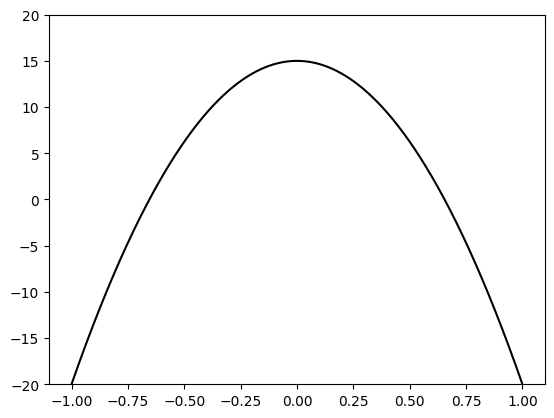

In [6]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i  for i in range(n)]) ,linestyle='-', color='black')

draw_polynomial(coefs)

In [7]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2) #random.gauss(0,2) for noise
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

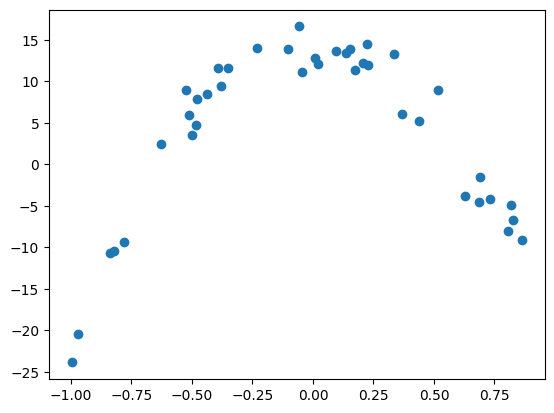

In [8]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [9]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [10]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly=PolynomialFeatures(degree=polyDegree,include_bias=False)
    X=poly.fit_transform(X.reshape(-1,1))
    return X

X_poly=addPoly(X,200)


In [11]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)
X_train.shape

(32, 200)

In [13]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [14]:
from sklearn.linear_model import LinearRegression

## TODO ##
# use sklearn linear regression to fit the data
model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)

LinearRegression()

Training error (rmse): 0.4051583141806126
Testing error (rmse): 5972361.126248566


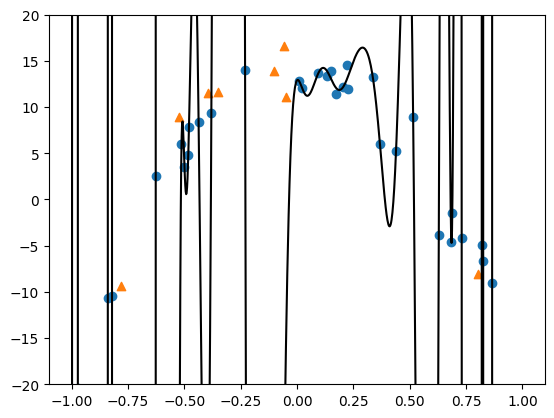

Polynomial coefficients
[12.890567575336869, 30.968092149070912, -5118.912395112824, 109798.81373202206, -600899.0236859855, -2641831.6944208937, 32014457.583514266, -22718467.864066258, -536669887.3698661, 1175359367.7963545, 4174949908.7929244, -14020488143.47813, -15112784915.839552, 82036107943.44475, 10978867297.888027, -256577413367.34412, 88206521155.62593, 387625639402.43744, -231259950166.97635, -123400993255.42038, 54227277952.26141, -237370073245.12836, 255739199691.6369, -10906461157.773993, 77538698802.56389, 132941413038.71587, -172486576513.37463, 131537591867.9297, -247154917967.11264, 76285135132.88153, -149032974213.36517, 24599637692.504074, 7087251807.446683, -15783188091.510887, 127108546493.72389, -51407460721.88008, 177184263582.68707, -83501307969.72845, 167374176633.8949, -107283323557.6234, 124191393284.29688, -117522626913.98619, 72188630765.71558, -112277106238.69673, 26846711267.01802, -93436455861.8216, -5383404636.831587, -65390810029.540825, -24206201628

In [15]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [16]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg = Pipeline([
    ('lasso', Lasso(alpha=0.1, ))#random_state=42,max_iter=10000
    ])
model_L1_reg.fit(X_train,y_train)
lasso_model = model_L1_reg.named_steps['lasso']




Training error (rmse): 1.928948178196685
Testing error (rmse): 2.664155866892851


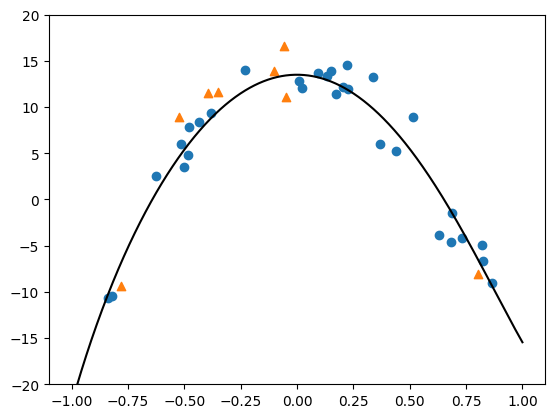

Polynomial coefficients
[13.50068229819314, 0.0, -32.29801931197382, 0.0, -0.0, 0.9078542147864863, -0.0, 2.4371236691552602, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0,

In [17]:
display_results(lasso_model)

## Training a polynomial regression model with L2 regularization

In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg = Pipeline([
   ('ridge', Ridge(alpha=.1))
    ])
model_L2_reg.fit(X_train,y_train)
ridge_model = model_L2_reg.named_steps['ridge']


Training error (rmse): 1.9243582308295026
Testing error (rmse): 2.461348557029849


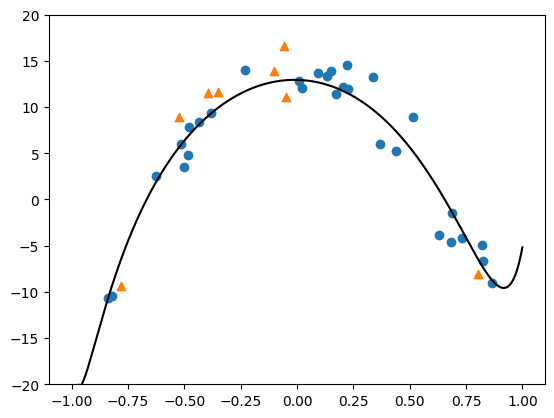

Polynomial coefficients
[12.944280608434006, -0.5218250288990296, -25.435731160885855, -1.443492843926455, -8.916210785552776, 1.9707944103677084, -1.9359670511603502, 2.957671423774097, 0.5012557958733255, 2.691108359201832, 1.2020594621642506, 2.0279740983203847, 1.2729152498941427, 1.356758262506606, 1.1425328784849993, 0.8097483366258744, 0.9721509439595375, 0.40693490516816677, 0.8166611154761519, 0.1281879774776274, 0.6897422916321165, -0.05560692998199218, 0.5903542122468969, -0.1710454784080191, 0.5132576165629477, -0.2390936808161197, 0.4529191111121436, -0.2751573714536385, 0.4047363701333021, -0.2901152319244913, 0.3652366714859794, -0.2914579680714576, 0.3319295139682015, -0.2842530271476659, 0.3030811122640041, -0.27188123722735497, 0.27750611590404345, -0.256570352538634, 0.2544025326893593, -0.2397698053399957, 0.23323003621579685, -0.22240884284525708, 0.21362389464767173, -0.20507199031685308, 0.19533569655798566, -0.18811716522389543, 0.17819329606675832, -0.171754579

In [19]:
display_results(ridge_model)
# فى الرسمه  ظاهر ان فى  كريف فى الطرفين دع عشان ال
# L2 "Ridge"
# مش بيقدر يصفر  ال
#wight
#عشان  دايمه بيقلل الويت  بنسبه من ال
#err
# عكس ال   L1
# بيقل ال wigth
#  بقيمه ثابته

## Viewing the predictions in the testing set

In [20]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.104061,13.890626,-1.723206e+02,13.150927,12.723701
1,-0.055715,16.612588,-2.714440e+01,13.400425,12.894561
2,-0.046806,11.139395,-1.298880e+01,13.429923,12.913085
3,-0.393375,11.552655,-3.635456e+01,8.490669,9.057583
4,-0.522768,8.966297,-4.937257e+01,4.612619,5.653640
5,-0.349591,11.616887,2.199799e+02,9.547115,9.930807
6,0.804332,-8.036859,-1.670632e+04,-6.558095,-6.510606
7,-0.781884,-9.367806,1.689237e+07,-6.945169,-6.581575


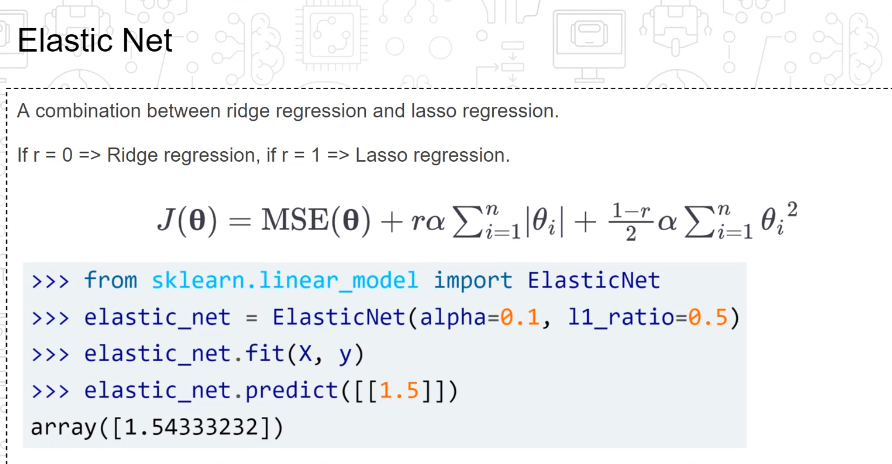

### Real Example (Predict fuel efficiency)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True )

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='',dtype=int)

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [23]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [24]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [28]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3062.8548221856595


##### lasso regularization

In [29]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [30]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920175
